In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

 # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np # linear algebra
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import warnings

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")



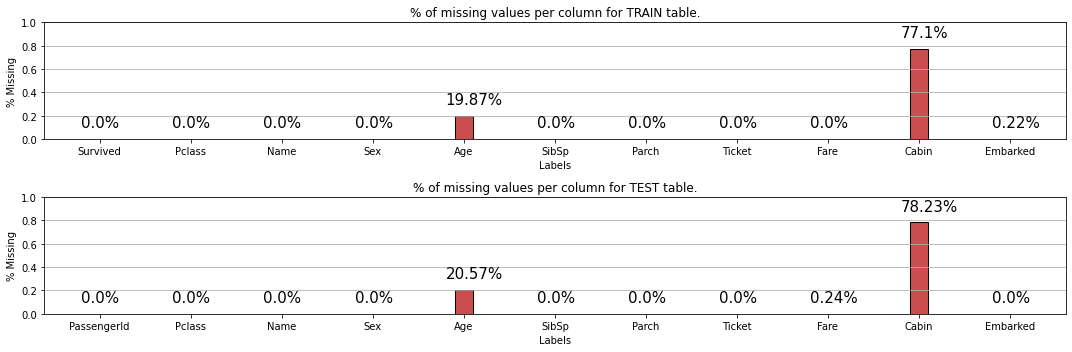

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(15,5))

titles = ['train', 'test']
for i, table in enumerate([train, test]):
    x_labels = np.array(list(table.isna().mean().index))[1-i:]
    x_pos = np.arange(len(x_labels))
    y = np.array(list(table.isna().mean()))[1-i:]

    ax[i].set_title('% of missing values per column for {} table.'.format(titles[i].upper()))
    ax[i].set_xticks(x_pos)
    ax[i].set_xticklabels(x_labels)
    ax[i].bar(x_pos, y, width=0.2, edgecolor='black', color=(0.8, 0.3, 0.3))
    ax[i].grid(axis='y')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlabel('Labels')
    ax[i].set_ylabel('% Missing')

    for pos, value in zip(x_pos, y):
         ax[i].annotate(str(round(value*100,2)) + '%',\
                       xy=(pos, value), arrowprops=None,\
                       xytext=(pos - 0.2, value + 0.1),\
                      fontsize=15)
fig.tight_layout()

plt.show()

In [5]:
p=train.loc[train.Sex=="female","Survived"]
q=train.loc[train.Sex=="male","Survived"]
print(sum(p)/len(p))
print(sum(q)/len(q))

0.7420382165605095
0.18890814558058924


In [6]:
print(train['Fare'].mean())
print(train['Fare'].std())
print(train['Fare'].max())
print(train['Fare'].min())
a=train.loc[train.Fare==0,"Survived"]
b=train.loc[(train.Fare>0) & (train.Fare)<=110,"Survived"]
c=train.loc[train.Fare>110,"Survived"]
print(sum(a)/len(a))
print(sum(b)/len(b))
print(sum(c)/len(c))
print (train.shape)

32.204207968574636
49.6934285971809
512.3292
0.0
0.06666666666666667
0.3838383838383838
0.7551020408163265
(891, 12)


In [7]:

a2=train.loc[(train.SibSp==0),"Survived"]
print(sum(a2)/len(a2))
a3=train.loc[(train.SibSp==1),"Survived"]
print(sum(a3)/len(a3))
train.dropna(how='all')
a1=train.loc[(train.Age<=5) | (train.Sex=="female") & (train.Parch==1)  & (train.Pclass!=3),"Survived"]
print(sum(a1)/len(a1))
train.loc[train.Sex == "male", "Sex"] = 1
train.loc[train.Sex == "female", "Sex"] = 0
train.loc[train.Pclass == 3, "Pclass"] = 1
train.loc[train.Pclass <3, "Pclass"] = 0
train.loc[train.Age <=5, "Age"] = 1
train.loc[train.Age >5, "Age"] = 0
train.loc[train.Cabin.isnull(),"Cabin"]=0
train.loc[train.Cabin.notnull(),"Cabin"]=1
train.loc[train.Fare==0,"Fare"]=0
train.loc[(train.Fare>0) & (train.Fare)<=110,"Fare"]=1
train.loc[train.Fare>110,"Fare"]=3
train.fillna(0)
test.loc[test.Sex == "male", "Sex"] = 1
test.loc[test.Sex == "female", "Sex"] = 0
test.loc[test.Pclass == 3, "Pclass"] = 1
test.loc[test.Pclass <3, "Pclass"] = 0
test.loc[test.Age <=5, "Age"] = 1
test.loc[test.Age >5, "Age"] = 0
test.loc[test.Cabin.isnull(),"Cabin"]=0
test.loc[test.Cabin.notnull(),"Cabin"]=1
test.loc[train.Fare==0,"Fare"]=0
test.loc[(train.Fare>0) & (train.Fare)<=110,"Fare"]=1
test.loc[train.Fare>110,"Fare"]=3
test.fillna(0)





0.34539473684210525
0.5358851674641149
0.8157894736842105


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,"Kelly, Mr. James",1,0.0,0,0,330911,1.0,1,Q
1,893,0,"Wilkes, Mrs. James (Ellen Needs)",0,0.0,1,0,363272,1.0,1,S
2,894,0,"Myles, Mr. Thomas Francis",1,0.0,0,0,240276,1.0,1,Q
3,895,0,"Wirz, Mr. Albert",1,0.0,0,0,315154,1.0,1,S
4,896,0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,0.0,1,1,3101298,1.0,1,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,"Spector, Mr. Woolf",1,0.0,0,0,A.5. 3236,1.0,1,S
414,1306,0,"Oliva y Ocana, Dona. Fermina",0,0.0,0,0,PC 17758,1.0,1,C
415,1307,0,"Saether, Mr. Simon Sivertsen",1,0.0,0,0,SOTON/O.Q. 3101262,1.0,1,S
416,1308,0,"Ware, Mr. Frederick",1,0.0,0,0,359309,1.0,1,S


In [8]:
train = train.reset_index()
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

my_imputer = SimpleImputer()

y = train["Survived"]

features = ["Pclass", "Sex", "Age","SibSp","Parch","Cabin","Fare"]
x = train[features]
x= my_imputer.fit_transform(x)
t1=test[features]
t1= my_imputer.fit_transform(t1)
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
t1 = sc_x.fit_transform(t1)
classifier = LogisticRegression(random_state = 0)
classifier.fit(x,y)

predictions=classifier.predict(t1)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Surv#ived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
